Notebook for Capstone Project 2

Get Data from Wikipiedia page

In [1]:
!conda install -c conda-forge lxml --yes 

Solving environment: done

# All requested packages already installed.



In [2]:
import folium 
import requests
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
dfcanada = pd.read_html(url)[0]
dfcanada.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
dfcanada.shape

(180, 3)

In [5]:
dfcoord = pd.read_csv('https://cocl.us/Geospatial_data/Geospatial_Coordinates.csv')

In [6]:
dfcoord.shape

(103, 3)

In [7]:
dfcoord.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
dfcanadalatlon = pd.merge(dfcanada, dfcoord, on='Postal Code')
dfcanadalatlon.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [9]:
dfcanadalatlon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postal Code   103 non-null    object 
 1   Borough       103 non-null    object 
 2   Neighborhood  103 non-null    object 
 3   Latitude      103 non-null    float64
 4   Longitude     103 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


Filter to get boroughs containing Toronto

In [10]:
dftoronto = dfcanadalatlon[dfcanadalatlon['Borough'].str.contains('Toronto')]
dftoronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [11]:
dftoronto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 2 to 100
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postal Code   39 non-null     object 
 1   Borough       39 non-null     object 
 2   Neighborhood  39 non-null     object 
 3   Latitude      39 non-null     float64
 4   Longitude     39 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.8+ KB


In [12]:
# create map using latitude and longitude values
latitude = 43.6532
longitude = -79.3832
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

#add markers to map
for lat, lng, borough, neighborhood in zip(dftoronto['Latitude'], dftoronto['Longitude'], dftoronto['Borough'], dftoronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [1]:
CLIENT_ID = '1' # your Foursquare ID
CLIENT_SECRET = '2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: 1
CLIENT_SECRET:2


In [14]:
neighborhood_latitude = dftoronto.iloc[0, 3] # neighborhood latitude value
neighborhood_longitude = dftoronto.iloc[0, 4] # neighborhood longitude value
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=C50W1WQG2H2XSYSGNUSMZLZBYY5UXNWJJSVEPJ0DE3WATEHF&client_secret=TMS1W3A4PR3LJG0YLOKUHKPAFQA0XTKYNP2RKEQZCWPOAX0S&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        return row['venue.categories'][0]['name']
    except:
        return None
        
    

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            continue #if no groups found under response
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
toronto_venues = getNearbyVenues(names=dftoronto['Neighborhood'],
                                   latitudes=dftoronto['Latitude'],
                                   longitudes=dftoronto['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [18]:
toronto_venues.shape

(1614, 7)

In [19]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub


In [20]:
toronto_venues.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [21]:
toronto_venues['Neighborhood'].value_counts().reset_index()

,index,Neighborhood
0,"Harbourfront East, Union Station, Toronto Islands",100
1,"Commerce Court, Victoria Hotel",100
2,"First Canadian Place, Underground city",100
3,"Garden District, Ryerson",100
4,"Toronto Dominion Centre, Design Exchange",100
5,Stn A PO Boxes,97
6,"Richmond, Adelaide, King",94
7,St. James Town,79
8,Church and Wellesley,75
9,Central Bay Street,65


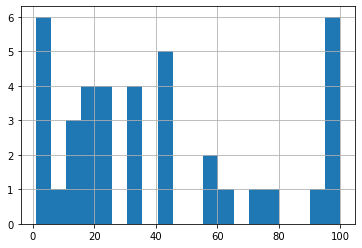

In [22]:
toronto_venues['Neighborhood'].value_counts().reset_index()['Neighborhood'].hist(bins=20)

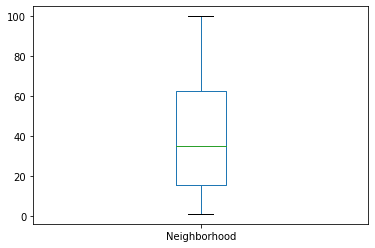

In [23]:
toronto_venues['Neighborhood'].value_counts().reset_index()['Neighborhood'].plot(kind='box')

In [24]:
toronto_venues['Venue Category'].value_counts().reset_index()

,index,Venue Category
0,Coffee Shop,143
1,Café,89
2,Restaurant,54
3,Italian Restaurant,41
4,Hotel,37
...,...,...
228,Gas Station,1
229,Ethiopian Restaurant,1
230,Cajun / Creole Restaurant,1
231,Mac & Cheese Joint,1


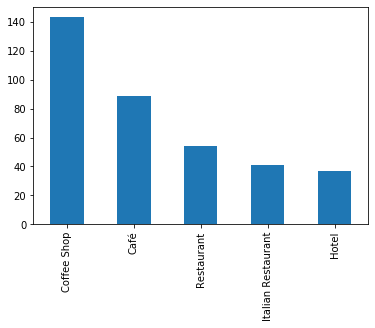

In [25]:
toronto_venues['Venue Category'].value_counts().head().plot(kind='bar')

In [26]:
toronto_venues[['Neighborhood','Venue Category']].groupby(['Neighborhood','Venue Category'], 
                                                          as_index=False).size()

Neighborhood                    Venue Category    
Berczy Park                     Art Gallery           1
                                BBQ Joint             1
                                Bagel Shop            1
                                Bakery                2
                                Basketball Stadium    1
                                                     ..
University of Toronto, Harbord  Sandwich Place        1
                                Sushi Restaurant      1
                                Theater               1
                                Video Game Store      1
                                Yoga Studio           1
Length: 1087, dtype: int64

In [27]:
toronto_venuecounts = toronto_venues[['Neighborhood','Venue Category']].groupby(['Neighborhood','Venue Category']).size().reset_index()

In [28]:
toronto_venuecounts.head()

,Neighborhood,Venue Category,0
0,Berczy Park,Art Gallery,1
1,Berczy Park,BBQ Joint,1
2,Berczy Park,Bagel Shop,1
3,Berczy Park,Bakery,2
4,Berczy Park,Basketball Stadium,1


In [29]:
toronto_venuecounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Neighborhood    1087 non-null   object
 1   Venue Category  1087 non-null   object
 2   0               1087 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.6+ KB


In [30]:
toronto_venuecounts.columns = ['Neighborhood', 'Venue Category', 'Count']

In [31]:
toronto_venuecounts.head()

,Neighborhood,Venue Category,Count
0,Berczy Park,Art Gallery,1
1,Berczy Park,BBQ Joint,1
2,Berczy Park,Bagel Shop,1
3,Berczy Park,Bakery,2
4,Berczy Park,Basketball Stadium,1


In [32]:
toronto_venuecounts_sum = toronto_venuecounts[['Neighborhood','Count']].groupby('Neighborhood', sort=False).sum().reset_index()

In [33]:
toronto_venuecounts_sum.head()

,Neighborhood,Count
0,Berczy Park,58
1,"Brockton, Parkdale Village, Exhibition Place",22
2,"Business reply mail Processing Centre, South C...",19
3,"CN Tower, King and Spadina, Railway Lands, Har...",15
4,Central Bay Street,65


In [34]:
toronto_venuecounts_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  39 non-null     object
 1   Count         39 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 752.0+ bytes


In [35]:
toronto_venuecounts_sum.columns = ['Neighborhood', 'Sum']

In [36]:
toronto_venuecounts_sum.head()

,Neighborhood,Sum
0,Berczy Park,58
1,"Brockton, Parkdale Village, Exhibition Place",22
2,"Business reply mail Processing Centre, South C...",19
3,"CN Tower, King and Spadina, Railway Lands, Har...",15
4,Central Bay Street,65


In [37]:
toronto_venue_count_sum_avg = toronto_venuecounts.merge(toronto_venuecounts_sum, left_on='Neighborhood', right_on='Neighborhood')

Find average number for Venue Category by Neighborhood

In [38]:
toronto_venue_count_sum_avg['Avg_by_Neighborhood'] = toronto_venue_count_sum_avg['Count']/toronto_venue_count_sum_avg['Sum'] 

In [39]:
toronto_venue_count_sum_avg.head()

,Neighborhood,Venue Category,Count,Sum,Avg_by_Neighborhood
0,Berczy Park,Art Gallery,1,58,0.017241
1,Berczy Park,BBQ Joint,1,58,0.017241
2,Berczy Park,Bagel Shop,1,58,0.017241
3,Berczy Park,Bakery,2,58,0.034483
4,Berczy Park,Basketball Stadium,1,58,0.017241


In [40]:
toronto_venue_count_sum_avg = toronto_venue_count_sum_avg.sort_values(['Neighborhood','Avg_by_Neighborhood'], ascending=[True, False])
toronto_venue_count_sum_avg

,Neighborhood,Venue Category,Count,Sum,Avg_by_Neighborhood
13,Berczy Park,Coffee Shop,5,58,0.086207
12,Berczy Park,Cocktail Bar,3,58,0.051724
3,Berczy Park,Bakery,2,58,0.034483
6,Berczy Park,Beer Bar,2,58,0.034483
9,Berczy Park,Café,2,58,0.034483
...,...,...,...,...,...
1082,"University of Toronto, Harbord",Sandwich Place,1,35,0.028571
1083,"University of Toronto, Harbord",Sushi Restaurant,1,35,0.028571
1084,"University of Toronto, Harbord",Theater,1,35,0.028571
1085,"University of Toronto, Harbord",Video Game Store,1,35,0.028571


In [41]:
toronto_venue_count_sum_avg['Avg_by_Neighborhood_Normalised'] = toronto_venue_count_sum_avg.groupby('Neighborhood')['Avg_by_Neighborhood'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
toronto_venue_count_sum_avg

,Neighborhood,Venue Category,Count,Sum,Avg_by_Neighborhood,Avg_by_Neighborhood_Normalised
13,Berczy Park,Coffee Shop,5,58,0.086207,1.00
12,Berczy Park,Cocktail Bar,3,58,0.051724,0.50
3,Berczy Park,Bakery,2,58,0.034483,0.25
6,Berczy Park,Beer Bar,2,58,0.034483,0.25
9,Berczy Park,Café,2,58,0.034483,0.25
...,...,...,...,...,...,...
1082,"University of Toronto, Harbord",Sandwich Place,1,35,0.028571,0.00
1083,"University of Toronto, Harbord",Sushi Restaurant,1,35,0.028571,0.00
1084,"University of Toronto, Harbord",Theater,1,35,0.028571,0.00
1085,"University of Toronto, Harbord",Video Game Store,1,35,0.028571,0.00


In [42]:
toronto_venue_count_sum_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 13 to 1086
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighborhood                    1087 non-null   object 
 1   Venue Category                  1087 non-null   object 
 2   Count                           1087 non-null   int64  
 3   Sum                             1087 non-null   int64  
 4   Avg_by_Neighborhood             1087 non-null   float64
 5   Avg_by_Neighborhood_Normalised  1063 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 59.4+ KB


Where max - min is 0, values would be NaN. Replace those with 1.

In [43]:
toronto_venue_count_sum_avg['Avg_by_Neighborhood_Normalised'].fillna(1) 

13      1.00
12      0.50
3       0.25
6       0.25
9       0.25
        ... 
1082    0.00
1083    0.00
1084    0.00
1085    0.00
1086    0.00
Name: Avg_by_Neighborhood_Normalised, Length: 1087, dtype: float64

For each Neighborhood, keep only those with 10 highest Avg_by_Neighborhood  

In [44]:
toronto_venue_10_each = toronto_venue_count_sum_avg.sort_values(['Neighborhood','Avg_by_Neighborhood_Normalised']).groupby('Neighborhood').tail(10)

In [45]:
toronto_venue_10_each

,Neighborhood,Venue Category,Count,Sum,Avg_by_Neighborhood,Avg_by_Neighborhood_Normalised
44,Berczy Park,Thai Restaurant,1,58,0.017241,0.00
45,Berczy Park,Vegetarian / Vegan Restaurant,1,58,0.017241,0.00
3,Berczy Park,Bakery,2,58,0.034483,0.25
6,Berczy Park,Beer Bar,2,58,0.034483,0.25
9,Berczy Park,Café,2,58,0.034483,0.25
...,...,...,...,...,...,...
1067,"University of Toronto, Harbord",Bookstore,2,35,0.057143,0.25
1076,"University of Toronto, Harbord",Italian Restaurant,2,35,0.057143,0.25
1077,"University of Toronto, Harbord",Japanese Restaurant,2,35,0.057143,0.25
1081,"University of Toronto, Harbord",Restaurant,2,35,0.057143,0.25


Keep Venues as columns with the Avg_by_Neighborhood as the value in the column

In [46]:
toronto_venue_as_columns = toronto_venue_10_each.pivot(index='Neighborhood', columns='Venue Category')['Avg_by_Neighborhood_Normalised'].fillna(0)

In [47]:
toronto_venue_as_columns.drop(columns=['Neighborhood'], inplace=True)

In [48]:
toronto_venue_as_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, Berczy Park to University of Toronto, Harbord
Columns: 109 entries, Airport Lounge to Yoga Studio
dtypes: float64(109)
memory usage: 33.5+ KB


In [49]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_venue_as_columns)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 3, 2, 2, 0, 2, 0, 0, 1, 2, 4, 0, 2, 0, 0, 3, 1, 3, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 3, 3, 3, 0, 3, 0, 1, 2, 2, 0, 3], dtype=int32)

In [50]:
toronto_venue_as_columns['Cluster'] = kmeans.labels_
#toronto_venue_as_columns

In [51]:
dftorontomerge = dftoronto.merge(toronto_venue_as_columns.reset_index()[['Neighborhood', 'Cluster']], left_on='Neighborhood', right_on='Neighborhood')

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dftorontomerge['Latitude'], dftorontomerge['Longitude'], dftorontomerge['Neighborhood'], dftorontomerge['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [53]:
toronto_venue_as_columns.columns

Index(['Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Aquarium', 'Asian Restaurant', 'Baby Store',
       'Bakery', 'Bar', 'Beer Bar',
       ...
       'Thai Restaurant', 'Theater', 'Toy / Game Store', 'Trail',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Yoga Studio', 'Cluster'],
      dtype='object', name='Venue Category', length=110)

In [54]:
toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==0].drop(columns=['Cluster']).idxmax(axis=1).to_frame() 


,0
Neighborhood,
Berczy Park,Coffee Shop
Central Bay Street,Coffee Shop
Church and Wellesley,Coffee Shop
"Commerce Court, Victoria Hotel",Coffee Shop
"First Canadian Place, Underground city",Coffee Shop
"Garden District, Ryerson",Clothing Store
"Harbourfront East, Union Station, Toronto Islands",Coffee Shop
"North Toronto West, Lawrence Park",Clothing Store
"Queen's Park, Ontario Provincial Government",Coffee Shop


In [55]:
toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==1].drop(columns=['Cluster']).idxmax(axis=1).to_frame() 


,0
Neighborhood,
Davisville,Pizza Place
"India Bazaar, The Beaches West",Fast Food Restaurant
"The Annex, North Midtown, Yorkville",Café


In [56]:
toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==2].drop(columns=['Cluster']).idxmax(axis=1).to_frame()


,0
Neighborhood,
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",Light Rail Station
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",Airport Service
Christie,Grocery Store
Davisville North,Airport Lounge
"Forest Hill North & West, Forest Hill Road Park",Airport Lounge
Lawrence Park,Airport Lounge
"Little Portugal, Trinity",Bar
"Moore Park, Summerhill East",Airport Lounge
"Parkdale, Roncesvalles",Breakfast Spot


In [57]:
toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==3].drop(columns=['Cluster']).idxmax(axis=1).to_frame()


,0
Neighborhood,
"Brockton, Parkdale Village, Exhibition Place",Café
"High Park, The Junction South",Café
"Kensington Market, Chinatown, Grange Park",Café
"Runnymede, Swansea",Café
St. James Town,Café
"St. James Town, Cabbagetown",Bakery
Studio District,Café
"University of Toronto, Harbord",Café


In [58]:
toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==4].drop(columns=['Cluster']).idxmax(axis=1).to_frame()


,0
Neighborhood,
"Dufferin, Dovercourt Village",Bakery


In [59]:
cluster0=toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==0]
cluster0.loc[:, (cluster0 >= 0.5).any(axis=0)]

Venue Category,Café,Clothing Store,Cocktail Bar,Coffee Shop,Hotel,Japanese Restaurant,Pub,Restaurant,Sushi Restaurant
Neighborhood,,,,,,,,,
Berczy Park,0.250000,0.0,0.500000,1.00,0.000000,0.000000,0.000000,0.250000,0.000000
Central Bay Street,0.200000,0.0,0.000000,1.00,0.000000,0.200000,0.000000,0.000000,0.000000
Church and Wellesley,0.000000,0.0,0.000000,1.00,0.000000,0.600000,0.200000,0.400000,0.800000
"Commerce Court, Victoria Hotel",0.545455,0.0,0.000000,1.00,0.454545,0.181818,0.000000,0.545455,0.000000
"First Canadian Place, Underground city",0.777778,0.0,0.000000,1.00,0.444444,0.222222,0.000000,0.444444,0.000000
"Garden District, Ryerson",0.250000,1.0,0.000000,0.75,0.000000,0.250000,0.000000,0.000000,0.000000
"Harbourfront East, Union Station, Toronto Islands",0.250000,0.0,0.000000,1.00,0.250000,0.000000,0.000000,0.166667,0.000000
"North Toronto West, Lawrence Park",0.000000,1.0,0.000000,1.00,0.000000,0.000000,0.000000,0.000000,0.000000
"Queen's Park, Ontario Provincial Government",0.000000,0.0,0.000000,1.00,0.000000,0.000000,0.000000,0.000000,0.142857


In [60]:
cluster1=toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==1]
cluster1.loc[:, (cluster1 >= 0.5).any(axis=0)]

Venue Category,Café,Coffee Shop,Dessert Shop,Fast Food Restaurant,Park,Pizza Place,Sandwich Place,Cluster
Neighborhood,,,,,,,,
Davisville,0.333333,0.333333,0.666667,0.0,0.0,1.0,0.666667,1
"India Bazaar, The Beaches West",0.000000,0.000000,0.000000,1.0,1.0,1.0,1.000000,1
"The Annex, North Midtown, Yorkville",1.000000,0.500000,0.000000,0.0,0.0,0.0,1.000000,1


In [61]:
cluster2=toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==2]
cluster2.loc[:, (cluster2 >= 0.5).any(axis=0)]

Venue Category,Airport Service,Bar,Breakfast Spot,Café,Gift Shop,Greek Restaurant,Grocery Store,Light Rail Station,Park,Cluster
Neighborhood,,,,,,,,,,
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,2
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2
Christie,0.0,0.0,0.0,0.666667,0.0,0.0,1.0,0.0,0.333333,2
Davisville North,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2
"Forest Hill North & West, Forest Hill Road Park",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2
Lawrence Park,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2
"Little Portugal, Trinity",0.0,1.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.000000,2
"Moore Park, Summerhill East",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2
"Parkdale, Roncesvalles",0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.000000,2


In [62]:
cluster3=toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==3]
cluster3.loc[:, (cluster3 >= 0.5).any(axis=0)]

Venue Category,American Restaurant,Bakery,Breakfast Spot,Café,Cocktail Bar,Coffee Shop,Dessert Shop,Gastropub,Grocery Store,Italian Restaurant,Mexican Restaurant,Pizza Place,Pub,Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Cluster
Neighborhood,,,,,,,,,,,,,,,,,,
"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.5,1.0,0.0,0.500000,0.0,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,3
"High Park, The Junction South",0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000,1.00,0.00,1.0,0.00,0.0,0.00,1.0,0.0,0.0,3
"Kensington Market, Chinatown, Grange Park",0.000000,0.500000,0.0,1.0,0.0,0.500000,0.5,0.000000,0.25,0.00,0.5,0.25,0.0,0.00,0.0,0.5,0.5,3
"Runnymede, Swansea",0.000000,0.000000,0.0,1.0,0.0,0.500000,0.0,0.000000,0.00,0.50,0.0,0.50,0.5,0.00,0.0,0.0,0.0,3
St. James Town,0.500000,0.000000,0.0,1.0,0.5,1.000000,0.0,0.500000,0.00,0.25,0.0,0.00,0.0,0.50,0.0,0.0,0.0,3
"St. James Town, Cabbagetown",0.000000,1.000000,0.0,0.5,0.0,1.000000,0.0,0.000000,0.00,0.50,0.0,1.00,0.5,0.50,0.0,0.0,0.0,3
Studio District,0.333333,0.333333,0.0,1.0,0.0,0.666667,0.0,0.333333,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,3
"University of Toronto, Harbord",0.000000,0.250000,0.0,1.0,0.0,0.000000,0.0,0.000000,0.00,0.25,0.0,0.00,0.0,0.25,0.0,0.0,0.0,3


In [63]:
cluster4=toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==4]
cluster4.loc[:, (cluster4 >= 0.5).any(axis=0)]

Venue Category,Bakery,Pharmacy,Cluster
Neighborhood,,,
"Dufferin, Dovercourt Village",1.0,1.0,4


In [64]:
cluster4=toronto_venue_as_columns[toronto_venue_as_columns['Cluster']==4]
cluster4.loc[:, ((cluster4 >= 0.25) ).any(axis=0)]

Venue Category,Bakery,Pharmacy,Cluster
Neighborhood,,,
"Dufferin, Dovercourt Village",1.0,1.0,4


In [65]:
toronto_venue_as_columns.columns

Index(['Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Aquarium', 'Asian Restaurant', 'Baby Store',
       'Bakery', 'Bar', 'Beer Bar',
       ...
       'Thai Restaurant', 'Theater', 'Toy / Game Store', 'Trail',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Yoga Studio', 'Cluster'],
      dtype='object', name='Venue Category', length=110)

In [66]:
italian = toronto_venue_as_columns[toronto_venue_as_columns['Italian Restaurant']>0].copy()
italian['Italian Restaurant']

Neighborhood
Central Bay Street                                   0.300000
Commerce Court, Victoria Hotel                       0.181818
Davisville                                           0.333333
Harbourfront East, Union Station, Toronto Islands    0.166667
Runnymede, Swansea                                   0.500000
St. James Town                                       0.250000
St. James Town, Cabbagetown                          0.500000
Stn A PO Boxes                                       0.222222
The Danforth West, Riverdale                         0.285714
Toronto Dominion Centre, Design Exchange             0.222222
University of Toronto, Harbord                       0.250000
Name: Italian Restaurant, dtype: float64

In [67]:
italian['Cluster']

Neighborhood
Central Bay Street                                   0
Commerce Court, Victoria Hotel                       0
Davisville                                           1
Harbourfront East, Union Station, Toronto Islands    0
Runnymede, Swansea                                   3
St. James Town                                       3
St. James Town, Cabbagetown                          3
Stn A PO Boxes                                       0
The Danforth West, Riverdale                         2
Toronto Dominion Centre, Design Exchange             0
University of Toronto, Harbord                       3
Name: Cluster, dtype: int32

In [68]:
italian.loc[:, ((italian >= 0.5) ).any(axis=0)].sort_values('Cluster')

Venue Category,American Restaurant,Bakery,Café,Cocktail Bar,Coffee Shop,Dessert Shop,Gastropub,Greek Restaurant,Hotel,Italian Restaurant,Pizza Place,Pub,Restaurant,Sandwich Place,Cluster
Neighborhood,,,,,,,,,,,,,,,
Central Bay Street,0.000000,0.00,0.200000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.300000,0.0,0.000000,0.000000,0.300000,0
"Commerce Court, Victoria Hotel",0.272727,0.00,0.545455,0.000000,1.000000,0.000000,0.0,0.0,0.454545,0.181818,0.0,0.000000,0.545455,0.000000,0
"Harbourfront East, Union Station, Toronto Islands",0.000000,0.00,0.250000,0.000000,1.000000,0.000000,0.0,0.0,0.250000,0.166667,0.0,0.000000,0.166667,0.000000,0
Stn A PO Boxes,0.000000,0.00,0.333333,0.222222,1.000000,0.000000,0.0,0.0,0.222222,0.222222,0.0,0.111111,0.222222,0.000000,0
"Toronto Dominion Centre, Design Exchange",0.222222,0.00,0.666667,0.000000,1.000000,0.000000,0.0,0.0,0.777778,0.222222,0.0,0.000000,0.333333,0.000000,0
Davisville,0.000000,0.00,0.333333,0.000000,0.333333,0.666667,0.0,0.0,0.000000,0.333333,1.0,0.000000,0.000000,0.666667,1
"The Danforth West, Riverdale",0.000000,0.00,0.000000,0.000000,0.285714,0.000000,0.0,1.0,0.000000,0.285714,0.0,0.000000,0.142857,0.000000,2
"Runnymede, Swansea",0.000000,0.00,1.000000,0.000000,0.500000,0.000000,0.0,0.0,0.000000,0.500000,0.5,0.500000,0.000000,0.000000,3
St. James Town,0.500000,0.00,1.000000,0.500000,1.000000,0.000000,0.5,0.0,0.000000,0.250000,0.0,0.000000,0.500000,0.000000,3


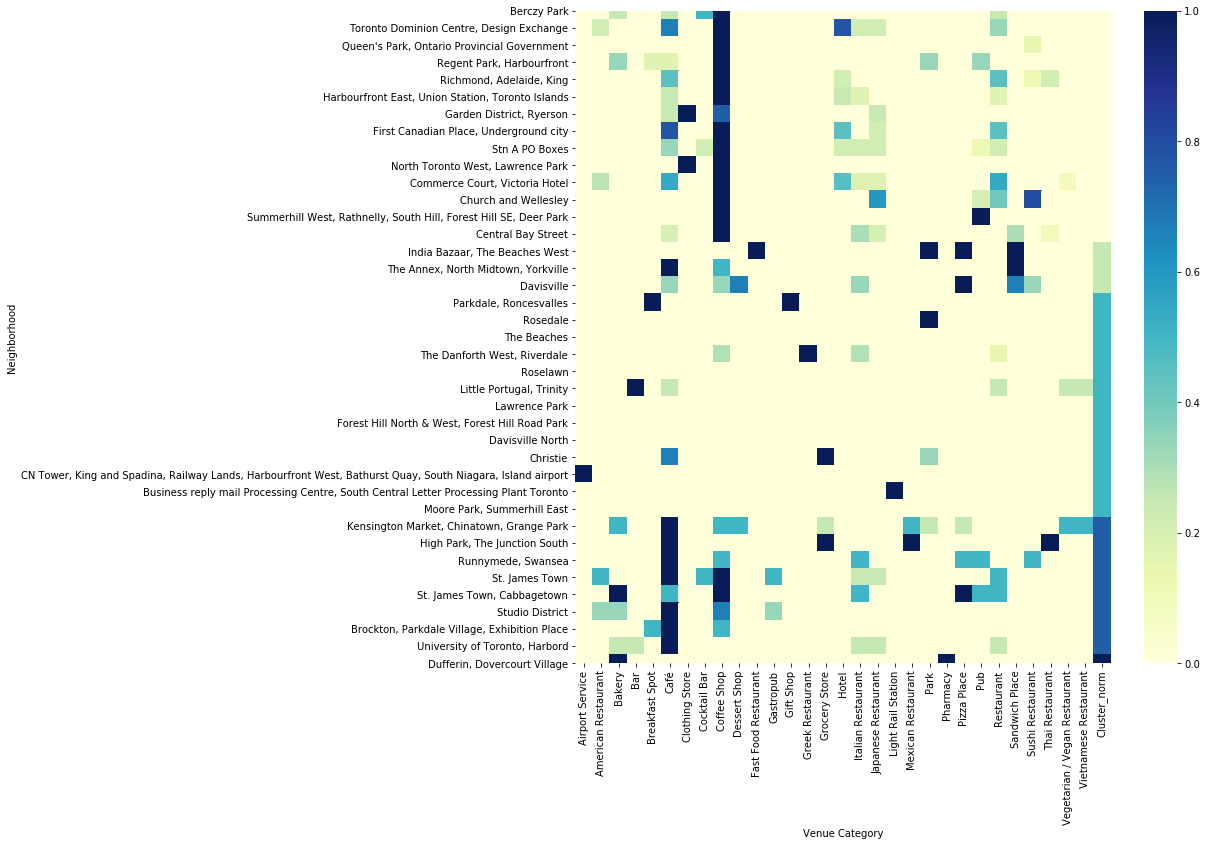

In [69]:
plt.figure(figsize = (12,12))
toronto_venue_as_columns['Cluster_norm'] = toronto_venue_as_columns['Cluster']/4
sns.heatmap(toronto_venue_as_columns.loc[:, ((toronto_venue_as_columns >= 0.5) ).any(axis=0)].drop(columns=['Cluster']).sort_values('Cluster_norm'), cmap="YlGnBu")


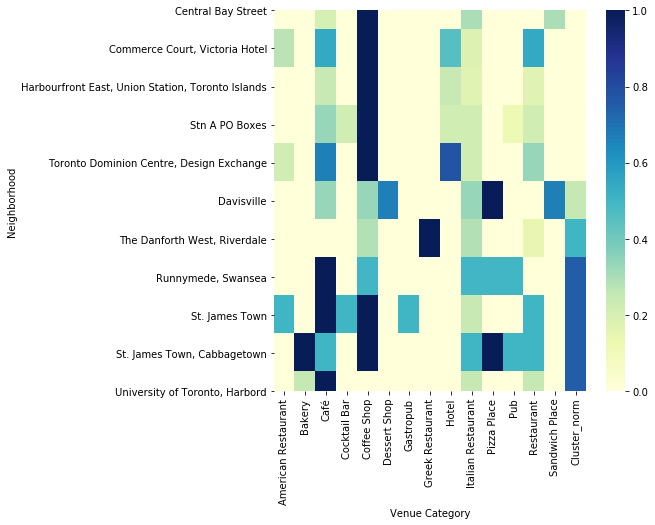

In [70]:
plt.figure(figsize = (7,7))
italian['Cluster_norm'] = italian['Cluster']/4
sns.heatmap(italian.loc[:, ((italian >= 0.5) ).any(axis=0)].drop(columns=['Cluster']).sort_values('Cluster_norm'), cmap="YlGnBu")